In [29]:
from ultralytics import YOLO

In [31]:
model = YOLO("/content/sample_data/yolov8n.pt")
results = model("/content/coco128/Images/006626.jpg")


image 1/1 /content/coco128/Images/006626.jpg: 448x640 4 persons, 4 bottles, 5 cups, 1 dining table, 316.9ms
Speed: 13.5ms preprocess, 316.9ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


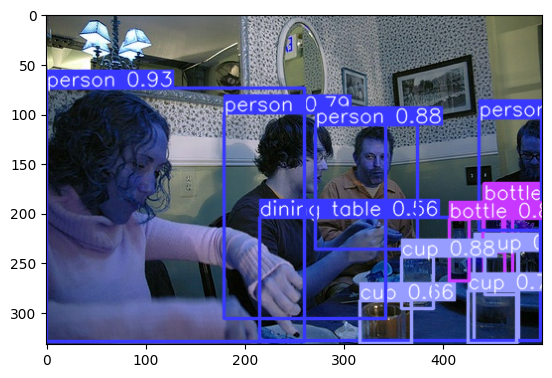

In [32]:
import matplotlib.pyplot as plt

plt.imshow(results[0].plot())
plt.show()

In [ ]:
results = model.train(data='/content/coco128.yaml', epochs=3)

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/sample_data/yolov8n.pt, data=/content/coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

In [9]:
def parse_annotation(annotation, class_name):
  label = []
  width = int(annotation["size"]["width"])

  height = int(annotation["size"]["height"])
  yolo_max_boxes = 100

  if "object" in annotation:
    if type(annotation["object"]) != list:
      tmp = [annotation["object"]]
    else:
      tmp = annotation["object"]

    for obj in tmp:
      _tmp = []
      _tmp.append(class_name.index(obj["name"]))
      _tmp.append(float(obj["bndbox"]["xmin"])/width)
      _tmp.append(float(obj["bndbox"]["ymin"])/height)
      _tmp.append(float(obj["bndbox"]["xmax"])/width)
      _tmp.append(float(obj["bndbox"]["ymax"])/height)
      label.append(_tmp)

    return label

In [28]:
from typing import Text
import xmltodict
file_name_list = open("/content/VOCdevkit/VOC2007/ImageSets/Main/train.txt").read().splitlines()
annotation_file_name_list = ["/content/VOCdevkit/VOC2007/Annotations/"+image_path+".xml" for image_path in file_name_list]
txt_file_name_list = ["/content/coco128/labels/"+image_path+".txt" for image_path in file_name_list]
class_name = ["person", "bird", "cat", "cow", "dog", "horse", "sheep", "aeroplane", "bicycle", "boat", "bus", "car", "motorbike", "train", "bottle", "chair", "diningtable", "pottedplant", "sofa", "tvmonitor"]

for path, txt in zip(annotation_file_name_list, txt_file_name_list):
  anno = xmltodict.parse(open(path).read())
  labels = parse_annotation(anno["annotation"], class_name)
  with open(txt, mode='a') as f:
    for label in labels:
      for l in label:
        f.write(str(l))
        f.write(" ")
      f.write('\n')

{'folder': 'VOC2007', 'filename': '000012.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '207539885'}, 'owner': {'flickrid': 'KevBow', 'name': '?'}, 'size': {'width': '500', 'height': '333', 'depth': '3'}, 'segmented': '0', 'object': {'name': 'car', 'pose': 'Rear', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}}
{'folder': 'VOC2007', 'filename': '000017.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '228217974'}, 'owner': {'flickrid': 'genewolf', 'name': 'whiskey kitten'}, 'size': {'width': '480', 'height': '364', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'person', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '185', 'ymin': '62', 'xmax': '279', 'ymax': '199'}}, {'name': 'horse', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '90', 